In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("/content/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# drop the customer id's
#df = df.drop(["CLIENTNUM","Dependent_count"],axis = 1)
df = df.drop(["CLIENTNUM"],axis = 1)

In [4]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.dtypes

,0
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64
Total_Relationship_Count,int64


In [6]:
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 10127 rows , 20 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
#checking for missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Total_Ct_Chng_Q4_Q1,0,0.0
Total_Trans_Ct,0,0.0
Total_Trans_Amt,0,0.0
Total_Amt_Chng_Q4_Q1,0,0.0
Avg_Open_To_Buy,0,0.0
Total_Revolving_Bal,0,0.0
Credit_Limit,0,0.0
Contacts_Count_12_mon,0,0.0


#checking for outliers

In [10]:
def checkOutliers(data,Title):
  fig = px.box(df,
               x=data,
               notched=True)
  fig.update_layout(
      title={
          'text': Title,
          'y':0.95,
          'x':0.45,
          'xanchor': 'center',
          'yanchor': 'top'})
  fig.show()

In [11]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)

TypeError: drop_numerical_outliers.<locals>.<lambda>() got an unexpected keyword argument 'reduce'

In [12]:
checkOutliers("Customer_Age","Customer Age")

In [ ]:
# df = remove_outlier(df,"Customer_Age")
# checkOutliers("Customer_Age","Customer Age After Outlier Treatment")

In [13]:
checkOutliers("Months_on_book","Period of relationship with bank")

In [ ]:
# df = remove_outlier(df,"Months_on_book")
# checkOutliers("Months_on_book","Period of relationship with bank After Outlier Treatment")

In [14]:
checkOutliers("Total_Relationship_Count","Total no. of products held by the customer")

In [15]:
checkOutliers("Months_Inactive_12_mon","No. of months inactive in the last 12 months")

In [ ]:
# df = remove_outlier(df,"Months_Inactive_12_mon")
# checkOutliers("Months_Inactive_12_mon","No. of months inactive in the last 12 months After Outlier Treatment")

In [16]:
checkOutliers("Contacts_Count_12_mon","No. of Contacts in the last 12 months")

In [ ]:
# df = remove_outlier(df,"Contacts_Count_12_mon")
# checkOutliers("Contacts_Count_12_mon","No. of Contacts in the last 12 months After Outlier Treatment")

In [17]:
checkOutliers("Credit_Limit","Credit Limit on the Credit Card")

In [ ]:
# df = remove_outlier(df,"Credit_Limit")
# checkOutliers("Credit_Limit","Credit Limit on the Credit Card After Outlier Treatment")

In [18]:
checkOutliers("Total_Revolving_Bal","Total Revolving Balance on the Credit Card")

In [19]:
checkOutliers("Avg_Open_To_Buy","Open to Buy Credit Line (Average of last 12 months)")

In [ ]:
# df = remove_outlier(df,"Avg_Open_To_Buy")
# checkOutliers("Avg_Open_To_Buy","Open to Buy Credit Line (Average of last 12 months)  After Outlier Treatment")

In [20]:
checkOutliers("Total_Amt_Chng_Q4_Q1","Change in Transaction Amount (Q4 over Q1)")

In [ ]:
# df = remove_outlier(df,"Total_Amt_Chng_Q4_Q1")
# checkOutliers("Total_Amt_Chng_Q4_Q1","Change in Transaction Amount (Q4 over Q1) After Outlier Treatment")

In [21]:
checkOutliers("Total_Trans_Amt","Total Transaction Amount (Last 12 months)")

In [ ]:
# df = remove_outlier(df,"Total_Trans_Amt")
# checkOutliers("Total_Trans_Amt","Total Transaction Amount (Last 12 months) After Outlier Treatment")

In [22]:
checkOutliers("Total_Trans_Ct","Total Transaction Count (Last 12 months)")

In [ ]:
# df = remove_outlier(df,"Total_Trans_Ct")
# checkOutliers("Total_Trans_Ct","Total Transaction Count (Last 12 months)")

In [23]:
checkOutliers("Avg_Utilization_Ratio","Average Card Utilization Ratio")

In [24]:
print("Size of New Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of New Dataset: 10127 rows , 20 columns


In [25]:
def numericDataVisualization(x_name,colorValue,Title):
  fig = px.histogram(df,
                     x = x_name,
                     color = colorValue,
                     marginal = "violin", # or box, rug
                     )
  fig.update_layout(
    title={
        'text': Title,
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

  fig.show()
  print("Skewness: %f" % df[x_name].skew())
  print("Kurtosis: %f" % df[x_name].kurt())

Data visualization with respect to Attrition_Flag Column

In [26]:
numericDataVisualization("Customer_Age","Attrition_Flag","Customer Age")

Skewness: -0.033605
Kurtosis: -0.288620


In [27]:
numericDataVisualization("Months_on_book","Attrition_Flag","Period of relationship with bank")

Skewness: -0.106565
Kurtosis: 0.400100


In [28]:
numericDataVisualization("Total_Relationship_Count","Attrition_Flag","Total no. of products held by the customer")

Skewness: -0.162452
Kurtosis: -1.006131


In [29]:
numericDataVisualization("Months_Inactive_12_mon","Attrition_Flag","No. of months inactive in the last 12 months")

Skewness: 0.633061
Kurtosis: 1.098523


In [30]:
numericDataVisualization("Contacts_Count_12_mon","Attrition_Flag","No. of Contacts in the last 12 months")

Skewness: 0.011006
Kurtosis: 0.000863


In [31]:
numericDataVisualization("Credit_Limit","Attrition_Flag","Credit Limit on the Credit Card")

Skewness: 1.666726
Kurtosis: 1.808989


In [32]:
numericDataVisualization("Total_Revolving_Bal","Attrition_Flag","Total Revolving Balance on the Credit Card")

Skewness: -0.148837
Kurtosis: -1.145992


In [33]:
numericDataVisualization("Avg_Open_To_Buy","Attrition_Flag","Open to Buy Credit Line (Average of last 12 months)")

Skewness: 1.661697
Kurtosis: 1.798617


In [34]:
numericDataVisualization("Total_Amt_Chng_Q4_Q1","Attrition_Flag","Change in Transaction Amount (Q4 over Q1)")

Skewness: 1.732063
Kurtosis: 9.993501


In [35]:
numericDataVisualization("Total_Trans_Amt","Attrition_Flag","Total Transaction Amount (Last 12 months)")

Skewness: 2.041003
Kurtosis: 3.894023


In [36]:
numericDataVisualization("Total_Trans_Ct","Attrition_Flag","Total Transaction Count (Last 12 months)")

Skewness: 0.153673
Kurtosis: -0.367163


In [37]:
numericDataVisualization("Total_Ct_Chng_Q4_Q1","Attrition_Flag","Change in Transaction Count (Q4 over Q1)")

Skewness: 2.064031
Kurtosis: 15.689293


In [38]:
numericDataVisualization("Avg_Utilization_Ratio","Attrition_Flag","Average Card Utilization Ratio")

Skewness: 0.718008
Kurtosis: -0.794972


In [39]:
def categoricalDataVisualization(x_name,colorName,Title):
  fig = px.histogram(df,
                     x=x_name,
                     color = colorName,
                     text_auto=True).update_xaxes(categoryorder = "total descending")
  fig.update_layout(
      title={
          'text': Title,
          'y':0.95,
          'x':0.45,
          'xanchor': 'center',
          'yanchor': 'top'})
  fig.show()

In [40]:
categoricalDataVisualization("Education_Level","Attrition_Flag","Education Level")

In [41]:
categoricalDataVisualization("Marital_Status","Attrition_Flag","Education Level")

In [42]:
categoricalDataVisualization("Income_Category","Attrition_Flag","Education Level")

In [43]:
categoricalDataVisualization("Card_Category","Attrition_Flag","Education Level")

In [44]:
categoricalDataVisualization("Attrition_Flag","Gender","Checking For Imbalanced Data")

**Our dataset contains imbalanced data**

In [45]:
df.Attrition_Flag = df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
df.Gender = df.Gender.replace({'F':1,'M':0})
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)

In [46]:
req_cols = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = StandardScaler()
df[req_cols] = scaler.fit_transform(df[req_cols])

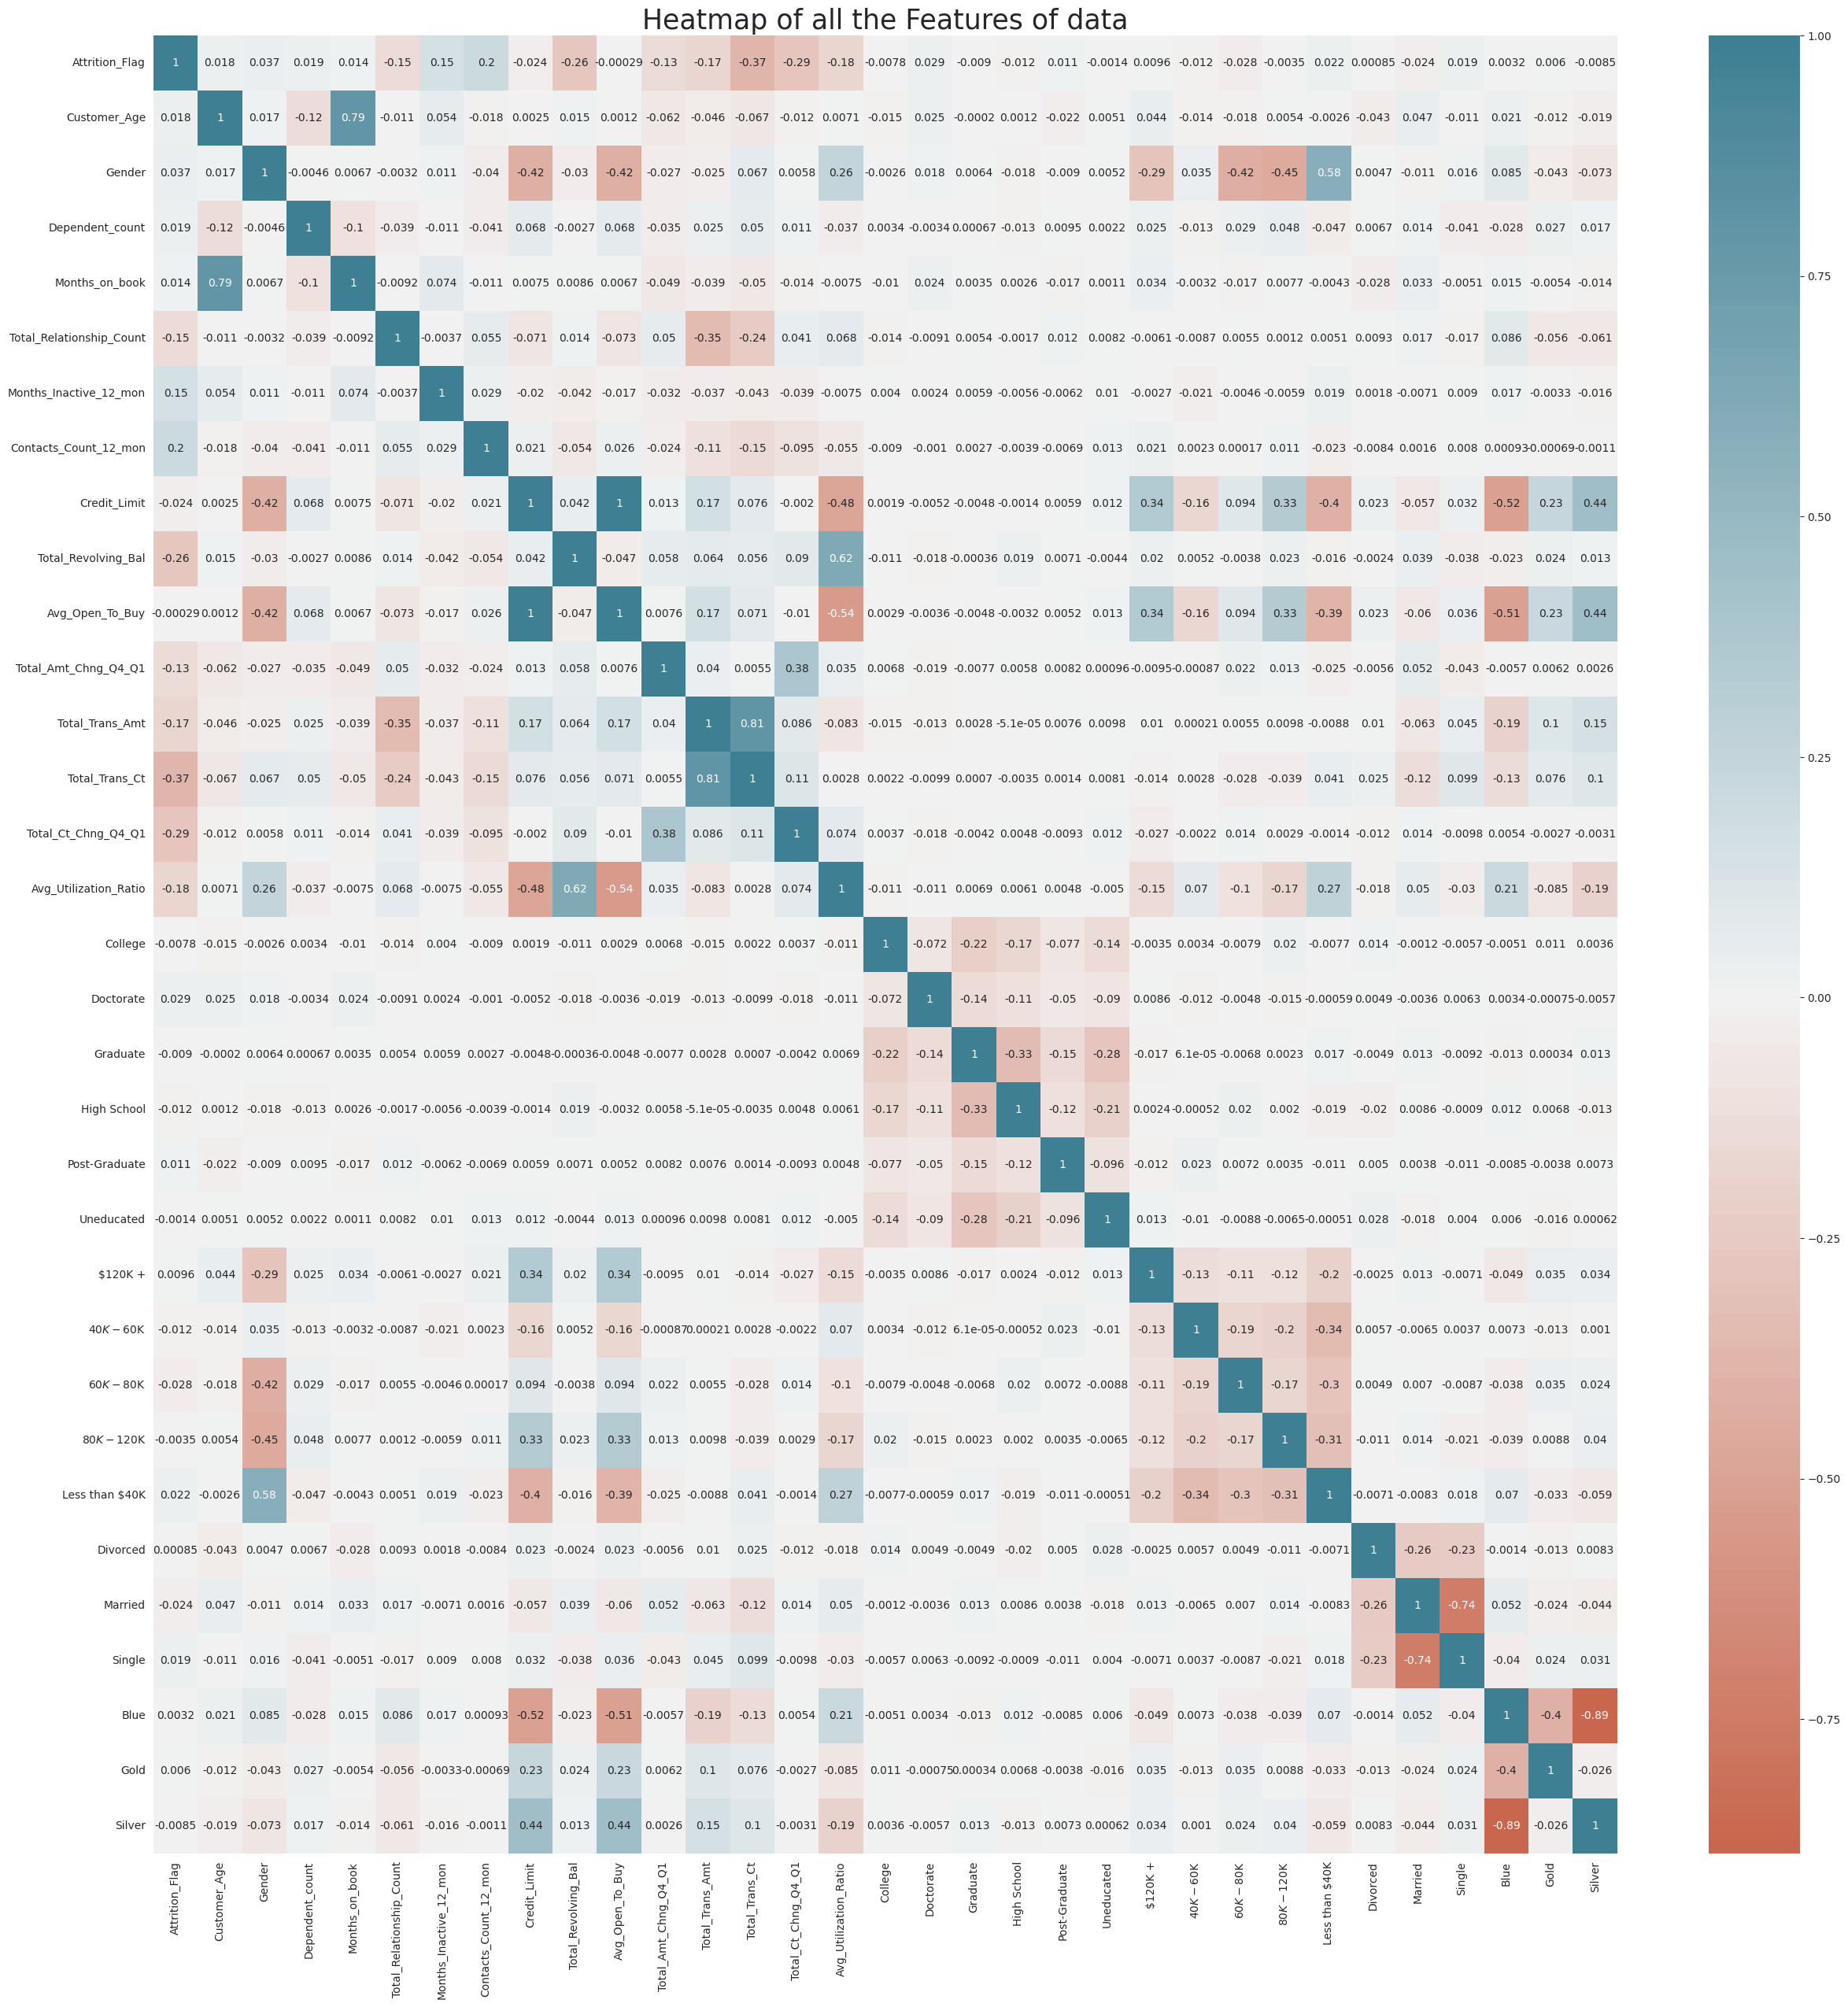

In [47]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0)
plt.title("Heatmap of all the Features of data", fontsize = 25)
plt.show()

In [48]:
y = df.pop("Attrition_Flag")
x = df

In [49]:
x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-0.165406,0,3,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,...,False,True,False,False,False,True,False,True,False,False
1,0.333570,1,5,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,...,False,False,False,True,False,False,True,True,False,False
2,0.583058,0,3,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,...,False,False,True,False,False,True,False,True,False,False
3,-0.789126,1,4,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,...,False,False,False,True,False,False,False,True,False,False
4,-0.789126,0,3,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,...,False,True,False,False,False,True,False,True,False,False


In [50]:
sm = SMOTE(random_state = 69, sampling_strategy = 1.0)
x, y = sm.fit_resample(x, y)

[0.02512396 0.01269003 0.01950377 0.02240287 0.05881703 0.04831452
 0.04261388 0.02366197 0.11241762 0.02352244 0.03450607 0.10211444
 0.17512953 0.05746261 0.05513484 0.00976707 0.00882911 0.01585698
 0.01317376 0.00757431 0.01218549 0.00722646 0.01384045 0.00967447
 0.01098054 0.01848757 0.00844138 0.01921261 0.01927113 0.00476092
 0.00226075 0.00504141]


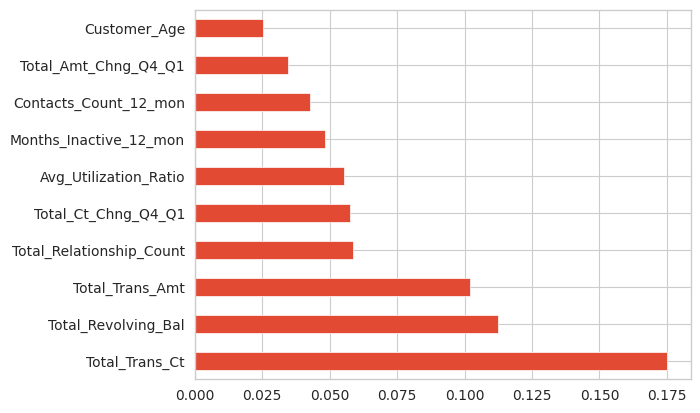

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [52]:
feat_importances.nlargest(10)

,0
Total_Trans_Ct,0.175130
Total_Revolving_Bal,0.112418
Total_Trans_Amt,0.102114
Total_Relationship_Count,0.058817
Total_Ct_Chng_Q4_Q1,0.057463
Avg_Utilization_Ratio,0.055135
Months_Inactive_12_mon,0.048315
Contacts_Count_12_mon,0.042614
Total_Amt_Chng_Q4_Q1,0.034506
Customer_Age,0.025124


In [53]:
Top10Features = ['Total_Trans_Ct',
                 'Total_Trans_Amt',
                 'Total_Revolving_Bal',
                 'Months_Inactive_12_mon',
                 'Total_Ct_Chng_Q4_Q1',
                 'Total_Relationship_Count',
                 'Avg_Utilization_Ratio',
                 'Total_Amt_Chng_Q4_Q1',
                 'Credit_Limit',
                 'Contacts_Count_12_mon']
x = x[Top10Features]
x.head()

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Months_Inactive_12_mon,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Contacts_Count_12_mon
0,-0.973895,-0.959707,-0.473422,-1.327136,3.834003,0.763943,-0.775882,2.623494,0.446622,0.492404
1,-1.357340,-0.916433,-0.366667,-1.327136,12.608573,1.407306,-0.616276,3.563293,-0.041367,-0.411616
2,-1.911206,-0.740982,-1.426858,-1.327136,6.807864,0.120579,-0.997155,8.367214,-0.573698,-2.219655
3,-1.911206,-0.951758,1.661686,1.641478,6.807864,-0.522785,1.759686,2.942843,-0.585251,-1.315636
4,-1.570365,-1.056263,-1.426858,-1.327136,7.509325,0.763943,-0.997155,6.455682,-0.430877,-2.219655


In [ ]:
# x_pca = PCA(n_components = 31, random_state = 410)
# x_pca.fit(x)
# x_pca_31 = x_pca.transform(x)

In [ ]:
# x_pca_31.shape

In [ ]:
# plt.plot(np.cumsum(x_pca.explained_variance_ratio_))
# plt.xlabel("Number of Components")
# plt.ylabel("Explained Variance")
# plt.show()

In [ ]:
# print("Variance Explained by each components")
# for i in range(0,31):
#   print("Variance Explained by first {} components : {}".format(i,np.cumsum(x_pca.explained_variance_ratio_)[i]))

In [ ]:
# x_pca = PCA(n_components = 8, random_state = 410)
# x_pca.fit(x)
# x_pca_8 = x_pca.transform(x)
# x_pca_8

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75,stratify = y, random_state = 42)

In [55]:
cv = KFold(n_splits = 5, random_state=100, shuffle=True)

LrModel = LogisticRegression()
scores = cross_val_score(LrModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

KnModel = KNeighborsClassifier()
scores = cross_val_score(KnModel, X_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

DtModel = DecisionTreeClassifier()
scores = cross_val_score(DtModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

RfModel = RandomForestClassifier()
scores = cross_val_score(RfModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

AbModel = AdaBoostClassifier()
scores = cross_val_score(AbModel, X_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

SvmModel = SVC(kernel= 'linear', random_state=1, C=0.1)
scores = cross_val_score(SvmModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

Logistics Regression Average CV Score:  0.8531764705882352
KNeighbors Average CV Score:  0.9350588235294117
Decision Tree Average CV Score:  0.9403921568627451
Random Forest Average CV Score:  0.9705098039215686
AdaBoost Tree Average CV Score:  0.952
Support Vector Machine Average CV Score:  0.8562352941176471


In [56]:
# decision Tree
rf_params = {
    'max_features': ['sqrt','auto','log2',None],
    'max_depth': sp_randint(5,50),
    'min_samples_leaf': sp_randint(1,15),
    'min_samples_split': sp_randint(2,30),
    'criterion':['gini','entropy'],
    'random_state': [100]
    }
n_iter_search=100

# for k in rf_params:
#     n_iter_search=round(n_iter_search*len(rf_params[k]))
# n_iter_search=n_iter_search*0.25

Random = RandomizedSearchCV(DtModel, param_distributions=rf_params,n_iter=n_iter_search,cv=cv,scoring='accuracy')
Random.fit(X_train, y_train)
print(Random.best_params_)
print('Accuracy: %.5f (%.5f)' % (Random.best_score_*100, mean(Random.cv_results_['std_test_score'])*100))

{'criterion': 'entropy', 'max_depth': 49, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 100}
Accuracy: 94.54902 (nan)


In [57]:
# KNeighour
rf_params = {
    'n_neighbors': sp_randint(1,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

n_iter_search=50

Random = RandomizedSearchCV(KnModel, param_distributions=rf_params,n_iter=n_iter_search,cv=cv,scoring='accuracy')
Random.fit(X_train, y_train)

print(Random.best_params_)
print('Accuracy: %.5f (%.5f)' % (Random.best_score_*100, mean(Random.cv_results_['std_test_score'])*100))

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}
Accuracy: 95.01176 (0.42405)


In [58]:
rf_params = {
    'penalty' : [ 'l1', 'l2' , 'elasticnet'],
    'C' : stats.uniform(0,1),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state': [100]
    #'class_weight': ['balanced', None ]
} #150

n_iter_search=50

Random = RandomizedSearchCV(LrModel, param_distributions=rf_params,n_iter=n_iter_search,cv=cv,scoring='accuracy')
Random.fit(X_train, y_train)

print(Random.best_params_)
print('Accuracy: %.5f (%.5f)' % (Random.best_score_*100, mean(Random.cv_results_['std_test_score'])*100))

{'C': 0.05386231205575753, 'penalty': 'l1', 'random_state': 100, 'solver': 'saga'}
Accuracy: 85.41176 (nan)


In [ ]:
# rf_params = {
#     'n_estimators': sp_randint(5,500),
#     'max_features': ['sqrt','auto','log2'],
#     'max_depth': sp_randint(5,50),
#     'min_samples_leaf': sp_randint(1,15),
#     'min_samples_split':sp_randint(2,30),
#     'criterion':['gini','entropy'],
#     'random_state': [100]
# }

# n_iter_search=300
# # for k in rf_params:
# #     n_iter_search=round(n_iter_search*len(rf_params[k]))


# # n_iter_search=n_iter_search*0.25

# Random = RandomizedSearchCV(RfModel, param_distributions=rf_params,n_iter=n_iter_search,cv=cv,scoring='accuracy')
# Random.fit(X_train, y_train)

# print(Random.best_params_)
# print('Accuracy: %.5f (%.5f)' % (Random.best_score_*100, mean(Random.cv_results_['std_test_score'])*100))

In [ ]:
model= SVC()
param_grid = {'kernel': ['rbf','linear'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = RandomizedSearchCV(SvmModel,param_distributions = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(X_train,y_train)

# Best score
print(modelsvm.best_params_)
print('Accuracy: %.5f (%.5f)' % (Random.best_score_*100, mean(Random.cv_results_['std_test_score'])*100))

In [ ]:
cv = KFold(n_splits = 5, random_state=100, shuffle=True)

LrModel = LogisticRegression(C = 0.20164760646072755, penalty = 'l2', random_state = 100, solver = 'liblinear')
scores = cross_val_score(LrModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

KnModel = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 1, weights = 'uniform')
scores = cross_val_score(KnModel, X_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

DtModel = DecisionTreeClassifier(criterion = 'gini', max_depth = 44, max_features = None, min_samples_leaf = 4, min_samples_split = 2, random_state = 100)
scores = cross_val_score(DtModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

RfModel = RandomForestClassifier(criterion = 'entropy', max_depth = 26, max_features = 'auto', min_samples_leaf = 9, min_samples_split = 18, n_estimators = 40, random_state = 100)
scores = cross_val_score(RfModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

AbModel = AdaBoostClassifier()
scores = cross_val_score(AbModel, X_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

SvmModel = SVC(kernel= 'linear', gamma = 1, C=1)
scores = cross_val_score(SvmModel, X_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

In [ ]:
KnModel.fit(X_train,y_train)
prediction = KnModel.predict(X_test)
print("The Accuracy Score on train data:", accuracy_score(KnModel.predict(X_train),y_train))
print("The Accuracy Score on test data:", accuracy_score(prediction,y_test))
print("The precision Score :", precision_score(prediction,y_test))
print("The recall Score :", recall_score(prediction,y_test))
print("The f1 score :", f1_score(prediction,y_test))
print("The Classification report : \n",classification_report(prediction,y_test))
sns.heatmap(confusion_matrix(prediction,y_test), annot = True)
plt.show()

In [ ]:
DtModel.fit(X_train,y_train)
prediction = DtModel.predict(X_test)
print("The Accuracy Score on train data:", accuracy_score(DtModel.predict(X_train),y_train))
print("The Accuracy Score on test data:", accuracy_score(prediction,y_test))
print("The precision Score :", precision_score(prediction,y_test))
print("The recall Score :", recall_score(prediction,y_test))
print("The f1 score :", f1_score(prediction,y_test))
print("The Classification report : \n",classification_report(prediction,y_test))
sns.heatmap(confusion_matrix(prediction,y_test), annot = True)
plt.show()

In [ ]:
RfModel.fit(X_train,y_train)
prediction = RfModel.predict(X_test)
print("The Accuracy Score on train data:", accuracy_score(RfModel.predict(X_train),y_train))
print("The Accuracy Score on test data:", accuracy_score(prediction,y_test))
print("The precision Score :", precision_score(prediction,y_test))
print("The recall Score :", recall_score(prediction,y_test))
print("The f1 score :", f1_score(prediction,y_test))
print("The Classification report : \n",classification_report(prediction,y_test))
sns.heatmap(confusion_matrix(prediction,y_test), annot = True)
plt.show()

In [ ]:
AbModel = AdaBoostClassifier()
AbModel.fit(X_train,y_train)
prediction = AbModel.predict(X_test)
print("The Accuracy Score on train data:", accuracy_score(AbModel.predict(X_train),y_train))
print("The Accuracy Score on test data:", accuracy_score(prediction,y_test))
print("The precision Score :", precision_score(prediction,y_test))
print("The recall Score :", recall_score(prediction,y_test))
print("The f1 score :", f1_score(prediction,y_test))
print("The Classification report : \n",classification_report(prediction,y_test))
sns.heatmap(confusion_matrix(prediction,y_test), annot = True)
plt.show()

In [60]:
import pickle
model = RandomForestClassifier(criterion='entropy', max_depth = 24, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 7, n_estimators = 143)
pickle.dump(model,open("model.pkl","wb"))

In [61]:
# loading the saved model
loaded_model = pickle.load(open('model.pkl', 'rb'))